# Final plots for bachelor thesis
Created 2025-05-10

While some plots were created previously in the bachelor project, this is a summary of all the plots used in the result part

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import itertools
from typing import Literal

import matplotlib as mpl
from matplotlib.axes._axes import Axes
from matplotlib.figure import Figure

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scipy

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'


In [2]:
# Settings

# Path to resource folder with the structures and metadata tables
path_resources = Path(r"D:\Eigene Datein\dev\Uni\JGU Bio Bachelorthesis\Daten\resources")

path_AF2 = path_resources / "AF2"
path_AF3 = path_resources / "AF3_hydrogens"
path_solved = path_resources / "solved"

In [3]:
dataAF2 = pd.read_csv(path_AF2 / "AF2_metrics.tsv", sep="\t")
for c in ["chainA_start", "chainA_end", "chainB_start", "chainB_end", "num_mutations", "num_align_atoms_domain", "num_align_resi_domain", "hbonds", "salt_bridges", "hydrophobic_interactions"]:
    if c not in dataAF2.columns:
        print(f"Column {bcolors.FAIL}{c}{bcolors.ENDC} not (yet) in data frame")
        continue
    dataAF2[c] = dataAF2[c].astype(pd.Int64Dtype())
display(dataAF2)

,project_name,run_id,benchmark_set,prediction_name,model_id,chainA_length,chainB_length,chainA_id,chainB_id,chainA_start,...,DockQ,iRMSD,LRMSD,Fnonnat,buried_area,min_distance,disulfide_bonds,salt_bridges,hbonds,hydrophobic_interactions
0,AlphaFold_benchmark,run37,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_0,312,5,A,B,165,...,0.878344,0.603831,1.575394,0.086957,613.651,6.063,0.0,0,9,0
1,AlphaFold_benchmark,run37,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_1,312,5,A,B,165,...,0.880716,0.418230,1.100588,0.050000,580.310,6.083,0.0,0,9,0
2,AlphaFold_benchmark,run37,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_2,312,5,A,B,165,...,0.883186,0.641834,1.776257,0.185185,662.104,6.072,0.0,0,10,3
3,AlphaFold_benchmark,run37,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_3,312,5,A,B,165,...,0.475511,1.686332,5.358800,0.363636,398.498,5.417,0.0,0,2,0
4,AlphaFold_benchmark,run37,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_4,312,5,A,B,165,...,0.223400,2.928606,9.908745,0.888889,323.304,5.092,0.0,0,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,AlphaFold_benchmark_DDI,run6,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_0,60,113,B,B,392,...,NaN,NaN,NaN,NaN,1617.382,5.591,0.0,3,7,56
3176,AlphaFold_benchmark_DDI,run6,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_1,60,113,B,B,392,...,NaN,NaN,NaN,NaN,791.256,6.373,0.0,0,3,7
3177,AlphaFold_benchmark_DDI,run6,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_2,60,113,B,B,392,...,NaN,NaN,NaN,NaN,882.547,7.906,0.0,1,2,11
3178,AlphaFold_benchmark_DDI,run6,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_3,60,113,B,B,392,...,NaN,NaN,NaN,NaN,1020.896,4.628,0.0,3,7,44


In [4]:
dataAF3 = pd.read_csv(path_AF3 / f"{path_AF3.name}_metrics.tsv", sep="\t")
for c in ["chainA_start", "chainA_end", "chainB_start", "chainB_end", "num_mutations", "num_align_atoms_domain", "num_align_resi_domain", "hbonds", "salt_bridges", "hydrophobic_interactions"]:
    if c not in dataAF3.columns:
        print(f"Column {bcolors.FAIL}{c}{bcolors.ENDC} not (yet) in data frame")
        continue
    dataAF3[c] = dataAF3[c].astype(pd.Int64Dtype())
display(dataAF3)

,model_preset,benchmark_set,prediction_name,model_id,ranking_score,chainA_length,chainB_length,chainA_id,chainB_id,chainA_start,...,iRMSD,LRMSD,Fnonnat,buried_area,min_distance,disulfide_bonds,salt_bridges,hbonds,hydrophobic_interactions,ipSAE
0,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_0,0.97,312,5,A,B,165,...,0.341276,0.831159,0.000000,602.041,6.241,0,0,10,0,0.869025
1,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_1,0.97,312,5,A,B,165,...,0.426121,1.169542,0.076923,615.163,6.207,0,0,11,0,0.868551
2,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_2,0.96,312,5,A,B,165,...,0.621263,1.944753,0.111111,684.934,5.810,0,0,13,0,0.855837
3,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_3,0.96,312,5,A,B,165,...,0.382246,1.037074,0.038462,603.522,6.264,0,0,11,0,0.850758
4,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_4,0.96,312,5,A,B,165,...,0.573091,1.749101,0.074074,662.502,5.890,0,0,14,0,0.850449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,alphafold3,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_0,0.36,60,113,B,B,392,...,NaN,NaN,NaN,1035.850,5.367,0,2,1,0,0.012324
3176,alphafold3,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_1,0.23,60,113,B,B,392,...,NaN,NaN,NaN,761.236,6.907,0,2,2,15,0.000000
3177,alphafold3,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_2,0.22,60,113,B,B,392,...,NaN,NaN,NaN,878.570,6.442,0,2,4,0,0.000000
3178,alphafold3,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_3,0.21,60,113,B,B,392,...,NaN,NaN,NaN,1542.632,4.914,0,1,2,48,0.000000


In [5]:
dataSolved = pd.read_csv(path_solved / "solved_hydrogens_metrics.tsv", sep="\t")
display(dataSolved)

,set,PDB_id,DDI_pfam_id,path,chainA_id,chainB_id,min_distance,buried_area,salt_bridges,hbonds,disulfide_bonds,hydrophobic_interactions
0,DMI,1ATP,NaN,DMI_hydrogens\1ATP_min_DMI.pdb,A,B,6.273,808.592,0,1,0,77
1,DMI,1AXC,NaN,DMI_hydrogens\1AXC_min_DMI.pdb,A,B,4.174,1209.332,0,4,0,62
2,DMI,1B72,NaN,DMI_hydrogens\1B72_min_DMI.pdb,A,B,5.182,547.149,0,1,0,36
3,DMI,1B8Q,NaN,DMI_hydrogens\1B8Q_min_DMI.pdb,A,B,4.376,871.756,0,4,0,42
4,DMI,1BXX,NaN,DMI_hydrogens\1BXX_min_DMI.pdb,A,B,4.435,783.465,0,6,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...
183,DDI,3ZNI,PF14447_PF00179,DDI_hydrogens\PF14447_PF00179_3ZNI_AC.pdb,A,C,5.268,1288.881,0,10,0,85
184,DDI,3J7Y,PF14978_PF00327,DDI_hydrogens\PF14978_PF00327_3J7Y_oZ.pdb,o,Z,4.885,2488.556,0,8,0,70
185,DDI,6D6Q,PF15985_PF10175,DDI_hydrogens\PF15985_PF10175_6D6Q_GL.pdb,G,L,3.891,3659.160,1,12,0,167
186,DDI,3KZ1,PF17838_PF00071,DDI_hydrogens\PF17838_PF00071_3KZ1_BE.pdb,B,E,5.276,1249.398,2,10,0,60


In [6]:
dataAF = pd.merge(
    left=dataAF3,
    right=dataAF2,
    left_on=["benchmark_set", "prediction_name", "model_id"],
    right_on=["benchmark_set", "prediction_name", "model_id"],
    suffixes=["_AF3", "_AF2"],
    how="inner"
)
for c in ["chainA_length", "chainB_length", "chainA_id", "chainB_id", "chainA_start", "chainA_end", "chainB_start", "chainB_end", "PDB_id", "ELM_instance", "DDI_pfam_id", "PDB_id_random_paired", "ELM_instance_random_paired", "DDI_pfam_id_random_paired", "sequence_initial", "sequence_mutated", "num_mutations"]:
    if len(dataAF[~(dataAF[c+"_AF2"] == dataAF[c+"_AF3"]) & (~dataAF[c+"_AF2"].isna()) & (~dataAF[c+"_AF3"].isna())]) > 0:
        print(f"Unmatched column {c}")
        continue
    dataAF.drop(columns=[c+"_AF2"], inplace=True)
    dataAF.rename(columns={c+"_AF3": c}, inplace=True)
dataAF.rename(columns={"ranking_score": "ranking_score_AF3"}, inplace=True)
dataAF.rename(columns={"model_confidence": "model_confidence_AF2"}, inplace=True)
dataAF.rename(columns={"ipSAE": "ipSAE_AF3"}, inplace=True)

display(dataAF)

,model_preset,benchmark_set,prediction_name,model_id,ranking_score_AF3,chainA_length,chainB_length,chainA_id,chainB_id,chainA_start,...,DockQ_AF2,iRMSD_AF2,LRMSD_AF2,Fnonnat_AF2,buried_area_AF2,min_distance_AF2,disulfide_bonds_AF2,salt_bridges_AF2,hbonds_AF2,hydrophobic_interactions_AF2
0,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_0,0.97,312,5,A,B,165,...,0.878344,0.603831,1.575394,0.086957,613.651,6.063,0.0,0,9,0
1,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_1,0.97,312,5,A,B,165,...,0.880716,0.418230,1.100588,0.050000,580.310,6.083,0.0,0,9,0
2,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_2,0.96,312,5,A,B,165,...,0.883186,0.641834,1.776257,0.185185,662.104,6.072,0.0,0,10,3
3,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_3,0.96,312,5,A,B,165,...,0.475511,1.686332,5.358800,0.363636,398.498,5.417,0.0,0,2,0
4,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_4,0.96,312,5,A,B,165,...,0.223400,2.928606,9.908745,0.888889,323.304,5.092,0.0,0,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,alphafold3,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_0,0.36,60,113,B,B,392,...,NaN,NaN,NaN,NaN,1617.382,5.591,0.0,3,7,56
3166,alphafold3,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_1,0.23,60,113,B,B,392,...,NaN,NaN,NaN,NaN,791.256,6.373,0.0,0,3,7
3167,alphafold3,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_2,0.22,60,113,B,B,392,...,NaN,NaN,NaN,NaN,882.547,7.906,0.0,1,2,11
3168,alphafold3,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_3,0.21,60,113,B,B,392,...,NaN,NaN,NaN,NaN,1020.896,4.628,0.0,3,7,44


In [7]:
# Stop cell designed to crash to allow "Run All" command in Jupyter notebooks to stop here
raise Exception("STOP")

Exception: STOP

### 0 Count of data

In [ ]:
dataAF2[(dataAF2["benchmark_set"] == "known_DMI") & (dataAF2["model_id"] == "ranked_0")]

,project_name,run_id,benchmark_set,prediction_name,model_id,chainA_length,chainB_length,chainA_id,chainB_id,chainA_start,...,DockQ,iRMSD,LRMSD,Fnonnat,buried_area,min_distance,disulfide_bonds,salt_bridges,hbonds,hydrophobic_interactions
0,AlphaFold_benchmark,run37,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_0,312,5,A,B,165,...,0.878344,0.603831,1.575394,0.086957,613.651,6.063,0.0,0,9,0
5,AlphaFold_benchmark,run37,known_DMI,DEG_COP1_1_5IGO,ranked_0,324,8,A,B,352,...,0.203083,3.647857,11.785731,0.818182,1025.173,5.075,0.0,0,6,54
10,AlphaFold_benchmark,run37,known_DMI,DEG_Kelch_Keap1_1_2FLU,ranked_0,285,6,A,B,325,...,0.956840,0.406243,0.409987,0.135135,853.680,5.658,0.0,4,12,6
15,AlphaFold_benchmark,run37,known_DMI,DEG_Kelch_Keap1_2_3WN7,ranked_0,286,7,A,B,324,...,0.627900,1.098010,3.811533,0.357143,847.029,5.699,0.0,2,4,18
20,AlphaFold_benchmark,run37,known_DMI,DEG_MDM2_SWIB_1_1YCR,ranked_0,80,8,A,B,30,...,0.927639,0.491499,0.974915,0.038462,969.729,4.725,0.0,0,2,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,AlphaFold_benchmark,run37,known_DMI,TRG_ER_FFAT_1_2RR3,ranked_0,125,9,A,B,4,...,0.832137,1.023273,1.642793,0.128205,1121.818,4.348,0.0,0,7,53
660,AlphaFold_benchmark,run37,known_DMI,TRG_LysEnd_GGAAcLL_1_1JWG,ranked_0,147,7,A,B,1,...,0.949574,0.470555,1.451951,0.093750,1066.671,5.933,0.0,1,6,60
665,AlphaFold_benchmark,run37,known_DMI,TRG_NES_CRM1_1_3GB8,ranked_0,179,16,A,B,447,...,0.683162,1.423170,2.824227,0.153846,1389.344,4.832,0.0,3,5,104
670,AlphaFold_benchmark,run37,known_DMI,TRG_NLS_Bipartite_1_1PJM,ranked_0,460,17,A,B,70,...,0.838144,0.780334,2.332849,0.160000,2256.518,4.881,0.0,4,20,50


In [ ]:
len(dataAF)

3170

In [ ]:
print(f'known DMI (AF2 only): {len(dataAF2[(dataAF2["benchmark_set"] == "known_DMI") & (dataAF2["model_id"] == "ranked_0")])}')
print(f'known DMI (AF3 only): {len(dataAF3[(dataAF3["benchmark_set"] == "known_DMI") & (dataAF3["model_id"] == "ranked_0")])}')
print(f'known DMI (dataAF): {len(dataAF[(dataAF["benchmark_set"] == "known_DMI") & (dataAF["model_id"] == "ranked_0")])}')

print(f'random DMI (AF2 only): {len(dataAF2[(dataAF2["benchmark_set"] == "random_DMI") & (dataAF2["model_id"] == "ranked_0")])}')
print(f'random DMI (AF3 only): {len(dataAF3[(dataAF3["benchmark_set"] == "random_DMI") & (dataAF3["model_id"] == "ranked_0")])}')
print(f'random DMI (dataAF): {len(dataAF[(dataAF["benchmark_set"] == "random_DMI") & (dataAF["model_id"] == "ranked_0")])}')

print(f'1 mutations DMI (AF2 only): {len(dataAF2[(dataAF2["benchmark_set"] == "mutations_DMI") & (dataAF2["model_id"] == "ranked_0") & (dataAF2["num_mutations"] == 1)])}')
print(f'1 mutations DMI (AF3 only): {len(dataAF3[(dataAF3["benchmark_set"] == "mutations_DMI") & (dataAF3["model_id"] == "ranked_0") & (dataAF3["num_mutations"] == 1)])}')
print(f'1 mutations DMI (dataAF): {len(dataAF[(dataAF["benchmark_set"] == "mutations_DMI") & (dataAF["model_id"] == "ranked_0") & (dataAF["num_mutations"] == 1)])}')

print(f'2 mutations DMI (AF2 only): {len(dataAF2[(dataAF2["benchmark_set"] == "mutations_DMI") & (dataAF2["model_id"] == "ranked_0") & (dataAF2["num_mutations"] == 2)])}')
print(f'2 mutations DMI (AF3 only): {len(dataAF3[(dataAF3["benchmark_set"] == "mutations_DMI") & (dataAF3["model_id"] == "ranked_0") & (dataAF3["num_mutations"] == 2)])}')
print(f'2 mutations DMI (dataAF): {len(dataAF[(dataAF["benchmark_set"] == "mutations_DMI") & (dataAF["model_id"] == "ranked_0") & (dataAF["num_mutations"] == 2)])}')

print(f'known DDI (AF2 only): {len(dataAF2[(dataAF2["benchmark_set"] == "known_DDI") & (dataAF2["model_id"] == "ranked_0")])}')
print(f'known DDI (AF3 only): {len(dataAF3[(dataAF3["benchmark_set"] == "known_DDI") & (dataAF3["model_id"] == "ranked_0")])}')
print(f'known DDI (dataAF): {len(dataAF[(dataAF["benchmark_set"] == "known_DDI") & (dataAF["model_id"] == "ranked_0")])}')

print(f'random DDI (AF2 only): {len(dataAF2[(dataAF2["benchmark_set"] == "random_DDI") & (dataAF2["model_id"] == "ranked_0")])}')
print(f'random DDI (AF3 only): {len(dataAF3[(dataAF3["benchmark_set"] == "random_DDI") & (dataAF3["model_id"] == "ranked_0")])}')
print(f'random DDI (dataAF): {len(dataAF[(dataAF["benchmark_set"] == "random_DDI") & (dataAF["model_id"] == "ranked_0")])}')

known DMI (AF2 only): 136
known DMI (AF3 only): 138
known DMI (dataAF): 136
random DMI (AF2 only): 136
random DMI (AF3 only): 136
random DMI (dataAF): 136
1 mutations DMI (AF2 only): 134
1 mutations DMI (AF3 only): 134
1 mutations DMI (dataAF): 134
2 mutations DMI (AF2 only): 134
2 mutations DMI (AF3 only): 134
2 mutations DMI (dataAF): 134
known DDI (AF2 only): 48
known DDI (AF3 only): 46
known DDI (dataAF): 46
random DDI (AF2 only): 48
random DDI (AF3 only): 48
random DDI (dataAF): 48


In [ ]:
dataAF[(dataAF["benchmark_set"] == "known_DMI") & (dataAF["model_id"] == "ranked_0") & (dataAF["hbonds_AF2"].isna())]

In [ ]:
pdbs_knownDMI = set(dataAF[dataAF["benchmark_set"] == "known_DMI"]["PDB_id"])
pdbs_randomDMI1 = set(dataAF[dataAF["benchmark_set"] == "random_DMI"]["PDB_id"])
pdbs_randomDMI2 = set(dataAF[dataAF["benchmark_set"] == "random_DMI"]["PDB_id_random_paired"])
pdbs_mutations_DMI = set(dataAF[dataAF["benchmark_set"] == "mutations_DMI"]["PDB_id"])
pdbs_knownDDI = set(dataAF[dataAF["benchmark_set"] == "known_DDI"]["PDB_id"])
pdbs_randomDDI = set(dataAF[dataAF["benchmark_set"] == "random_DDI"]["PDB_id"])

display(pdbs_randomDMI1.union(pdbs_randomDMI2) - pdbs_knownDMI)
display(pdbs_knownDMI - pdbs_randomDMI1.union(pdbs_randomDMI2))
display(pdbs_knownDDI - pdbs_randomDDI)
display(pdbs_randomDDI - pdbs_knownDDI)

In [ ]:
dataAF[(dataAF["ranking_score_AF3"].isna()) & (dataAF["model_id"] == "ranked_0")]

In [ ]:
dataAF[(dataAF["PDB_id"] == "1G4B") & (dataAF["model_id"] == "ranked_0")]

In [ ]:
dataAF[dataAF["RMSD_all_atom_AF2"].isna() & (dataAF["model_id"] == "ranked_0")]

In [ ]:
# Checking if all structures are measured using the hydrophobic parameter
print(f'known DMI (AF2 only): {len(dataAF2[(dataAF2["benchmark_set"] == "known_DMI") & (dataAF2["model_id"] == "ranked_0") & ~(dataAF2["hydrophobic_interactions"].isna())])}')
print(f'known DMI (AF3 only): {len(dataAF3[(dataAF3["benchmark_set"] == "known_DMI") & (dataAF3["model_id"] == "ranked_0") & ~(dataAF3["hydrophobic_interactions"].isna())])}')
print(f'known DMI (dataAF): {len(dataAF[(dataAF["benchmark_set"] == "known_DMI") & (dataAF["model_id"] == "ranked_0") & ~(dataAF["hydrophobic_interactions_AF3"].isna())])}')

In [ ]:
dataAF[dataAF["model_id"] == "ranked_0"]

### 1 Metrics comparison

Solved vs AF predictions

In [ ]:
def plot_interface_metrics_vs_solved(af_v: Literal["AF2", "AF3"], rmsd_filter: float|bool, model_id_filter: bool, save: bool):
    sns.set_theme()
    mpl.rcParams['font.family'] = 'DejaVu Sans'
    categories = { # column name: [title, ylabel]
        "ranking_score_AF3" if af_v == "AF3" else "model_confidence_AF2" : ["Model confidence", ""], 
        f"min_distance_{af_v}": ["Interface distance", "Å"],
        f"buried_area_{af_v}": ["Interface surface area", "Å²"], 
        f"salt_bridges_{af_v}": ["Salt bridges", "count"], 
        f"hbonds_{af_v}": ["Hydrogen bonds", "count"], 
        f"hydrophobic_interactions_{af_v}": ["Hydrophobic interactions", "count"],
        f"disulfide_bonds_{af_v}": ["Disulfide bonds", "count"]
    }

    filter_mask = True # Default: No filter
    if rmsd_filter:
        filter_mask = (dataAF[f"RMSD_all_atom_peptide_{af_v}"] <= rmsd_filter) # Filter for RMSD < 2
    if model_id_filter:
        filter_mask = filter_mask & (dataAF["model_id"] == "ranked_0")

    print(np.count_nonzero(filter_mask), len(filter_mask) if not isinstance(filter_mask, bool) else "-")

    def _plot(axes, cs: list, legend_c: int|None = None):
        nonlocal af_v
        for i, (c, (title, ylabel)) in enumerate([list(categories.items())[c_] for c_ in cs]):
            cc = c.replace(f"_{af_v}", "") # Column name without _AF2 or _AF3 corrosponds to dataSolved column
            ax = axes[i]
            df = []
            df.extend({"source": af_v, "set": "DMI", "column": title, "value": v} for v in dataAF[(dataAF["benchmark_set"] == "known_DMI") & filter_mask][c].dropna())
            df.extend({"source": af_v, "set": "DDI", "column": title, "value": v} for v in dataAF[(dataAF["benchmark_set"] == "known_DDI") & filter_mask][c].dropna())
            df.extend({"source": "solved", "set": "DMI", "column": title, "value": v} for v in dataSolved[dataSolved["set"] == "DMI"][cc].dropna())
            df.extend({"source": "solved", "set": "DDI", "column": title, "value": v} for v in dataSolved[dataSolved["set"] == "DDI"][cc].dropna())
            df = pd.DataFrame(df)

            p = sns.violinplot(df, x="set", y="value", hue="source", ax=ax, inner="quart", split=True, gap=0.05, cut=0, palette=["tab:orange" if af_v == "AF2" else "tab:blue", "tab:green"], density_norm="area", bw_adjust=0.5, legend=(i == legend_c))
            p.set_ylabel(ylabel)
            p.set_xlabel("")
            p.set_title(title)
    
    fig, axes = plt.subplots(1, 2, figsize=(9,3))
    _plot(axes, [1,2], legend_c=1)
    plt.tight_layout()
    fig.suptitle(f"AlphaFold {3 if af_v == 'AF3' else 2} predictions of known PPI" + (f" (RMSD of motif/smaller domain < 2 Å)" if rmsd_filter else ""), y=1.08)
    axes[1].legend(ncol=2, bbox_to_anchor=(0.17, 0)) # Annotatede the last ax with an legend
    if save:
        plt.savefig(f"plots/interface metrics solved vs AF{3 if af_v == 'AF3' else 2}{f' RMSD below {rmsd_filter}' if rmsd_filter else ''} A.png", bbox_inches='tight', dpi=600)
    plt.show()

    fig, axes = plt.subplots(1, 3, figsize=(9,3))
    _plot(axes, [3,4,5])
    plt.tight_layout()
    if save:
        plt.savefig(f"plots/interface metrics solved vs AF{3 if af_v == 'AF3' else 2}{f' RMSD below {rmsd_filter}' if rmsd_filter else ''} B.png", bbox_inches='tight', dpi=600)
    plt.show()

634 3170


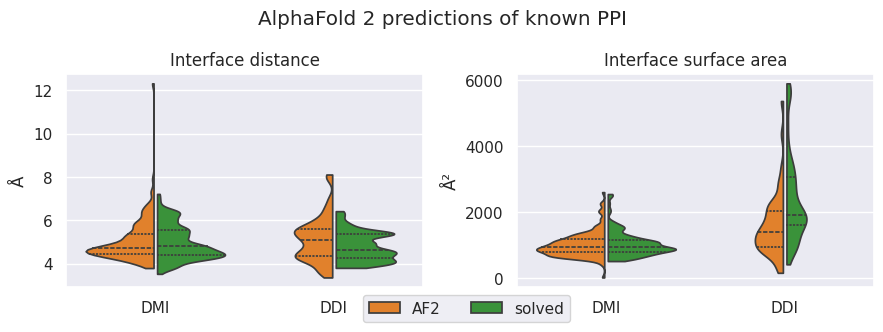

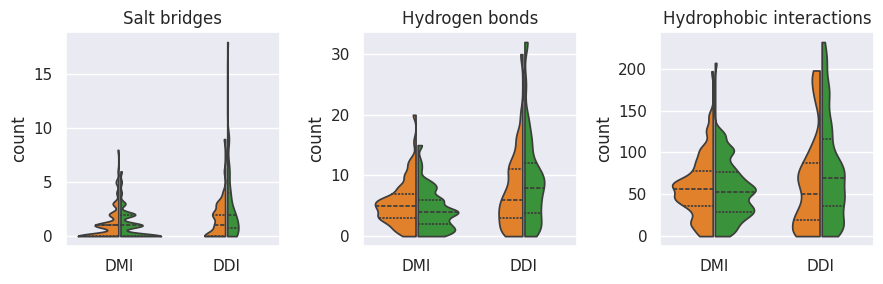

In [ ]:
plot_interface_metrics_vs_solved(af_v="AF2", rmsd_filter=False, model_id_filter=True, save=True)

In [ ]:
dataAF[(dataAF["RMSD_all_atom_peptide_AF3"] < 2) & (dataAF["model_id"] == "ranked_0") & (dataAF["benchmark_set"] == "known_DMI")]["buried_area_AF3"]

0       602.041
5      1250.340
10      848.152
20      962.633
40     1226.296
45      691.455
55     1099.009
60     1162.085
65     1181.219
75     1222.284
105    1520.381
130    1046.467
135     791.431
140     582.874
175     883.569
195    1470.519
200    1590.575
205    1368.030
210    1829.881
215     679.102
220     767.178
230     761.997
250     848.158
260     892.545
270    1086.726
285     645.434
290     747.353
310     856.017
315    1058.333
345     913.604
355     790.418
360     980.846
370    1680.211
395     685.796
400     847.870
410     877.798
420    1258.148
440     937.619
445    1268.388
450    1001.931
525     788.449
530     606.027
535     761.000
540     669.835
565     749.551
575     844.073
580     963.830
595    1966.162
600     642.140
605    1096.010
610    1126.606
615     600.887
625    1229.526
630     595.035
635    1066.322
640     890.240
650     828.133
660    1070.678
675     886.982
Name: buried_area_AF3, dtype: float64

344 3170


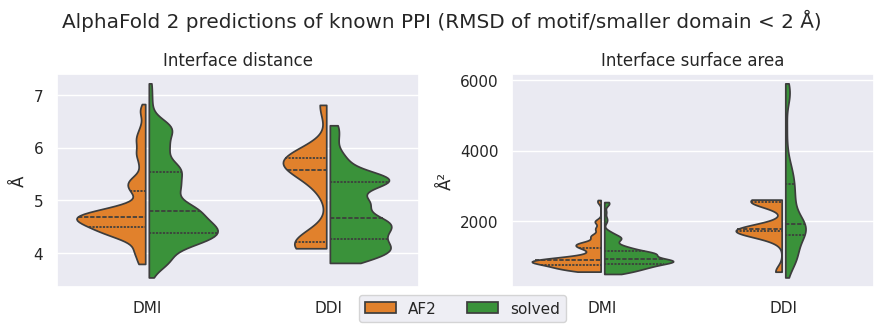

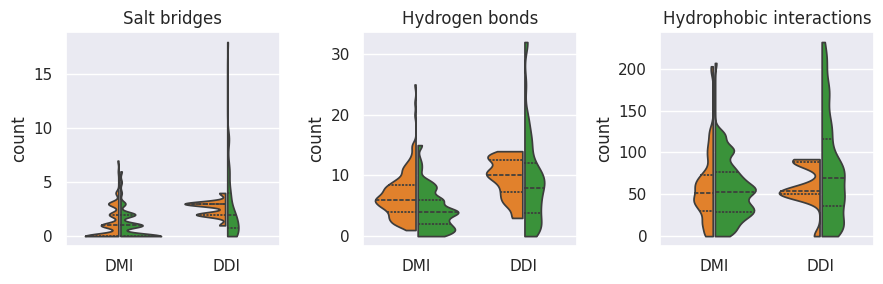

In [ ]:
plot_interface_metrics_vs_solved(af_v="AF2", rmsd_filter=2, model_id_filter=False, save=True)

634 3170


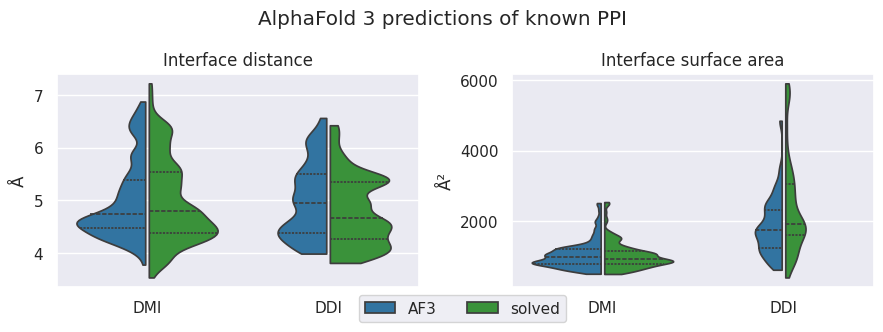

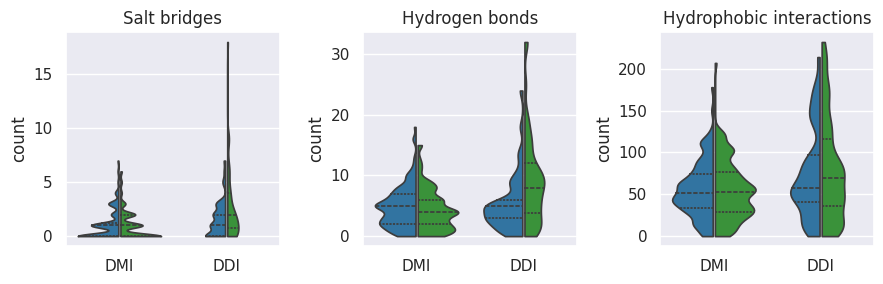

In [ ]:
plot_interface_metrics_vs_solved(af_v="AF3", rmsd_filter=False, model_id_filter=True, save=True)

### 2 ROC curves

Old AF metrics

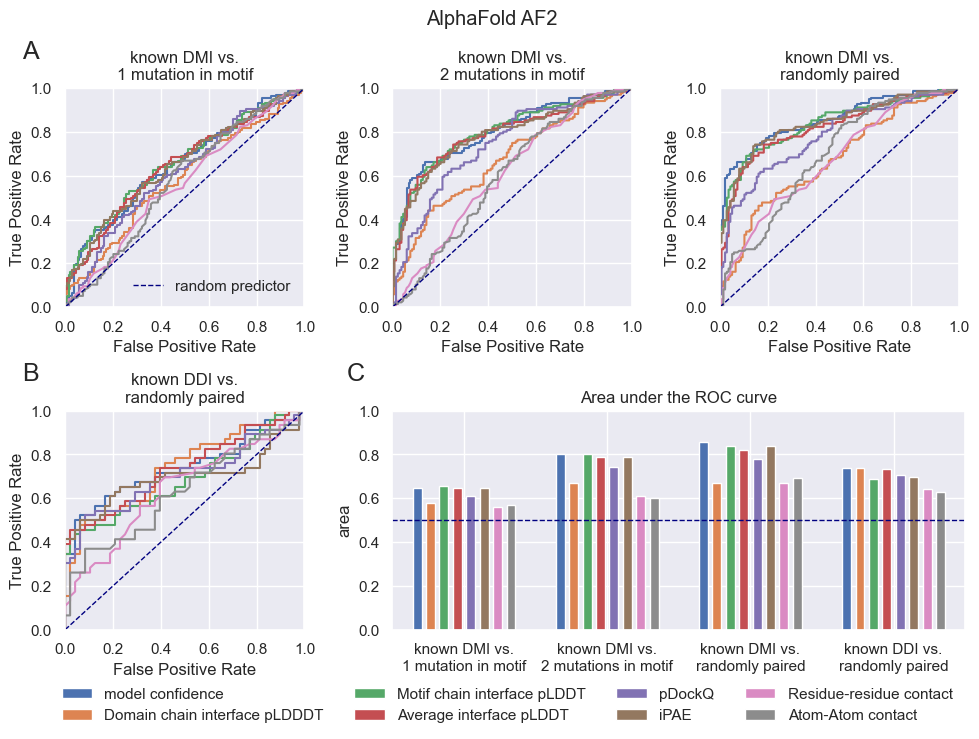

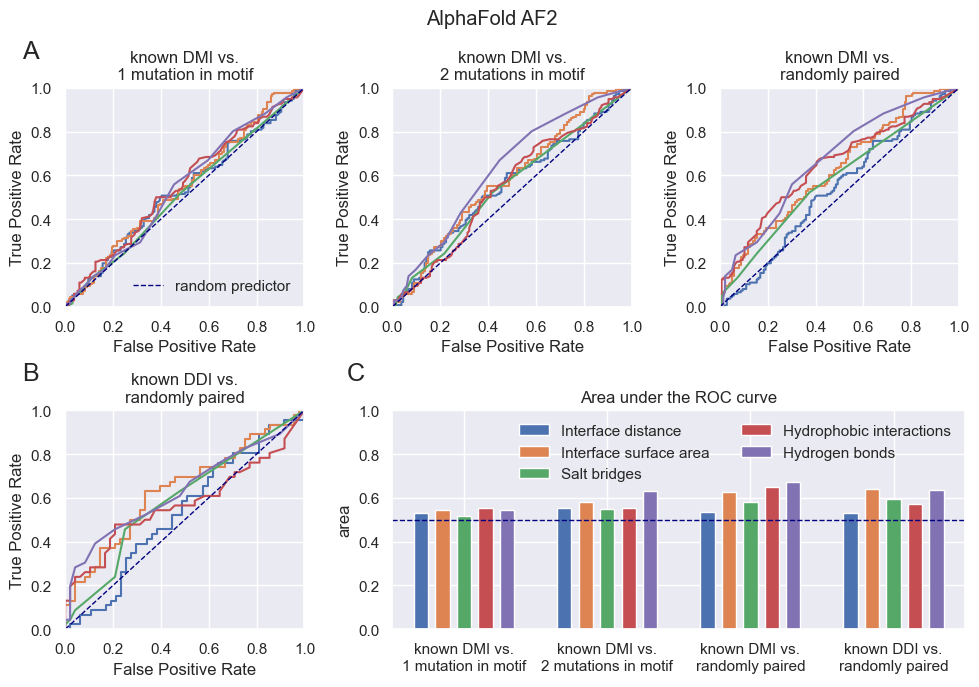

In [ ]:
def plot_roc_curves(af_v: Literal["AF2", "AF3"], metric_set: Literal["AF_metrics", "interface_metrics"], model_id_filter: bool, save: bool):
    sns.set_theme()
    fig, axes = plt.subplots(2, 3, figsize=(10,7))

    axes[0,0].set_title("known DMI vs.\n1 mutation in motif")
    axes[0,1].set_title("known DMI vs.\n2 mutations in motif")
    axes[0,2].set_title("known DMI vs.\nrandomly paired")
    axes[1,0].set_title("known DDI vs.\nrandomly paired")
    axes[1,1].set_title("Area under the ROC curve")
    axes[1,2].set_title("")
    fig.suptitle(f"AlphaFold {'3' if af_v == 'AF3' else '2'}")

    if metric_set == "AF_metrics":
        metric_columns = [("model confidence", "model_confidence") if af_v == "AF2" else ("ranking_ core", "ranking_score") ,
                        ("Domain chain interface pLDDDT", "chainA_intf_avg_plddt"),
                        ("Motif chain interface pLDDT", "chainB_intf_avg_plddt"),
                        ("Average interface pLDDT", "intf_avg_plddt"),
                        ("pDockQ", "pDockQ"),
                        ("iPAE", "iPAE", True),
                        ("Residue-residue contact", "num_res_res_contact"),
                        ("Atom-Atom contact", "num_atom_atom_contact"),
                        ]
    elif metric_set == "interface_metrics":
        metric_columns = [("Interface distance", "min_distance", True),
                        ("Interface surface area", "buried_area"),
                        ("Salt bridges", "salt_bridges"),
                        ("Hydrophobic interactions", "hydrophobic_interactions"),
                        ("Hydrogen bonds", "hbonds"),
                        ]

    # (display name, column name, [reverse], [highlight]) # Note: rever, highlight optional. highligh means
    metric_columns = [[x[0], x[1] + "_"+af_v, x[2] if len(x) >= 3 else False, x[3] if len(x) >= 4 else False] for x in metric_columns]

    rows_sets = [dataAF[dataAF["num_mutations"] == 1], dataAF[dataAF["num_mutations"] == 2], dataAF[dataAF["benchmark_set"] == "random_DMI"], dataAF[dataAF["benchmark_set"] == "random_DDI"]]
    rows_true = [dataAF[dataAF["benchmark_set"] == "known_DMI"], dataAF[dataAF["benchmark_set"] == "known_DDI"]]

    if model_id_filter:
        rows_sets = [df[df["model_id"] == "ranked_0"] for df in rows_sets]
        rows_true = [df[df["model_id"] == "ranked_0"] for df in rows_true]

    for i, ax, rows_true, rows_false, in zip([0,1,2,3], np.ndarray.flatten(axes)[:4], [rows_true[0], rows_true[0], rows_true[0], rows_true[1]] , rows_sets):
        for ii, (metric_label, metric_column, reverse, highlight) in enumerate(metric_columns):
            tr = rows_true[metric_column].dropna()
            fa = rows_false[metric_column].dropna()
            y_true = [1]*len(tr) + [0]*len(fa)
            y_score = tr.to_list() + fa.to_list()
            if reverse:
                y_score = [-y for y in y_score]
            p = ax.plot(*roc_curve(y_true, y_score)[0:2])
            c = p[0].get_color()
            roc_score = roc_auc_score(y_true, y_score)
            lbl = None
            if i == 0:
                lbl = metric_label
            c_width = 0.5/len(metric_columns)
            axes[1,1].bar([(1-(1.5*c_width)*(len(metric_columns)-1)/2)+i+ii*1.5*c_width], [roc_score], width=c_width, color=c, label=lbl)

        ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label="random predictor")
        ax.set_xlim([0,1])
        ax.set_ylim([0,1])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')

    axes[1,1].set_xticks([1,2,3,4], ["known DMI vs.\n1 mutation in motif", "known DMI vs.\n2 mutations in motif", "known DMI vs.\nrandomly paired", "known DDI vs.\nrandomly paired"])
    axes[1,1].set_ylabel("area")
    axes[1,1].plot([0.5, 4.5], [0.5, 0.5], color='navy', lw=1, linestyle='--')
    axes[1,1].set_xlim([0.5,4.5])
    axes[1,1].set_ylim([0,1])
    axes[0,0].legend(frameon=False, loc="lower right")

    fig.tight_layout()

    ax11_pos = axes[1,1].get_position()
    ax11_pos.x1 += 1/3
    axes[1,1].set_position(ax11_pos)
    axes[1,2].set_visible(False)

    if len(metric_columns) >= 6:
        axes[1,1].legend(loc='upper center', bbox_to_anchor=(0.2, -0.2),
                fancybox=False, shadow=False, ncol=4, frameon=False)
    else:
        axes[1,1].legend(ncol=2, frameon=False)

    fig.text(0.03,0.91, "A", fontsize=18)
    fig.text(0.03,0.45, "B", fontsize=18)
    fig.text(0.355,0.45, "C", fontsize=18)

    if save:
        plt.savefig(f"./plots/{af_v}_ROC_curve{'_new_metrics' if metric_set == 'interface_metrics' else ''}.png", bbox_inches='tight', dpi=600)
    plt.show()



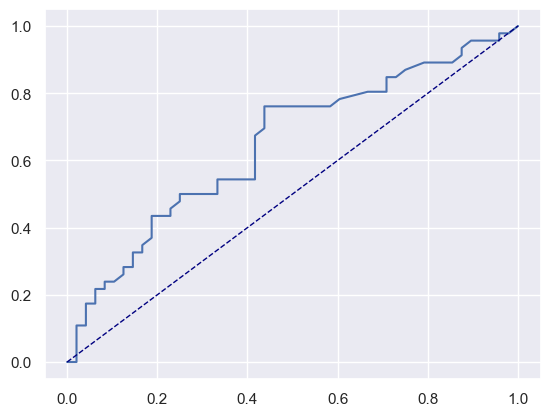

In [129]:
rows_true = dataAF[(dataAF["benchmark_set"] == "known_DDI") & (dataAF["model_id"] == "ranked_0")]
rows_false = dataAF[(dataAF["benchmark_set"] == "random_DDI") & (dataAF["model_id"] == "ranked_0")]
tr = rows_true["hydrophobic_interactions_AF3"].dropna()
fa = rows_false["hydrophobic_interactions_AF3"].dropna()
y_true = [1]*len(tr) + [0]*len(fa)
y_score = tr.to_list() + fa.to_list()
plt.plot(*roc_curve(y_true, y_score)[0:2])
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label="random predictor")

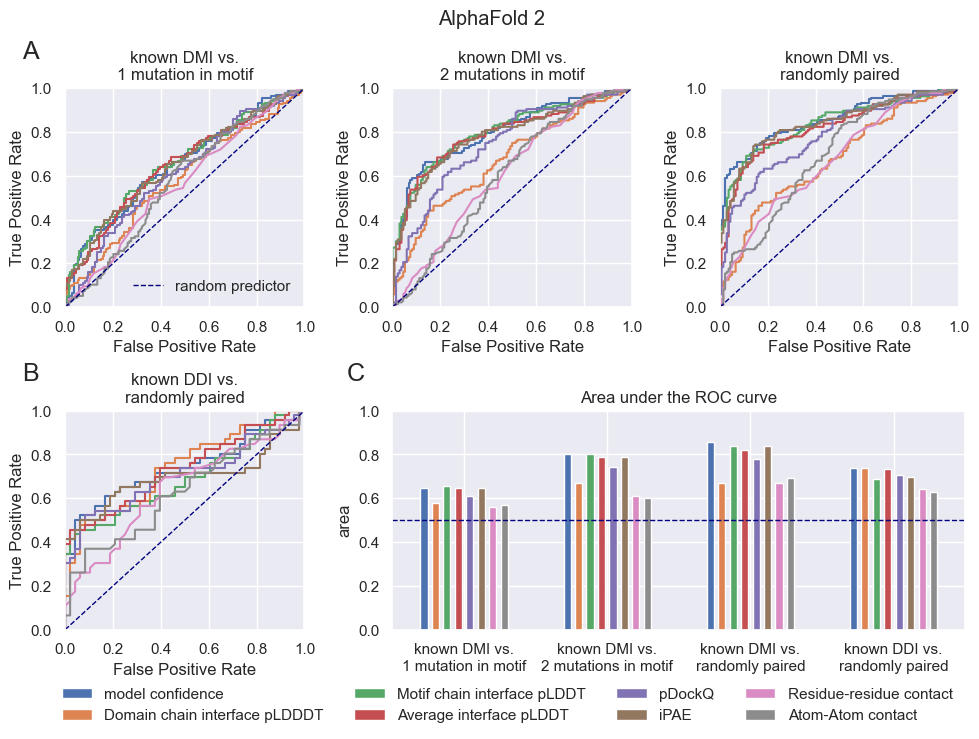

In [ ]:
# DMI and DDI combined

sns.set_theme()

# fig = plt.figure(figsize=(9,6))
# gs = fig.add_gridspec(2,3)
# ax1 = fig.add_subplot(gs[0, 0])
# ax2 = fig.add_subplot(gs[0, 1])
# ax3 = fig.add_subplot(gs[0, 2])
# ax4 = fig.add_subplot(gs[1, 0])
# ax5 = fig.add_subplot(gs[1, 1:])

fig, axes = plt.subplots(2, 3, figsize=(10,7))

#fig.suptitle("known DMI vs.")    
# axes[0,0].set_title("1 mutation in motif")
# ax2.set_title("2 mutations in motif")
# ax3.set_title("randomly paired DMI")
# ax4.set_title("known DDI vs.\nrandomly paired DDI")
# ax5.set_title("")
axes[0,0].set_title("known DMI vs.\n1 mutation in motif")
axes[0,1].set_title("known DMI vs.\n2 mutations in motif")
axes[0,2].set_title("known DMI vs.\nrandomly paired")
axes[1,0].set_title("known DDI vs.\nrandomly paired")
axes[1,2].set_title("")

# (display name, column name, reverse, highlight)
metric_columns = [("model confidence", "model_confidence"),
                  ("Domain chain interface pLDDDT", "chainA_intf_avg_plddt"),
                  ("Motif chain interface pLDDT", "chainB_intf_avg_plddt"),
                  ("Average interface pLDDT", "intf_avg_plddt"),
                  ("pDockQ", "pDockQ"),
                  ("iPAE", "iPAE", True),
                  ("Residue-residue contact", "num_res_res_contact"),
                  ("Atom-Atom contact", "num_atom_atom_contact"),
                ]

metric_columns = [[x[0], x[1] +"_AF2", x[2] if len(x) >= 3 else False, x[3] if len(x) >= 4 else False] for x in metric_columns]

rows_sets = [dataAF[dataAF["num_mutations"] == 1], dataAF[dataAF["num_mutations"] == 2], dataAF[dataAF["benchmark_set"] == "random_DMI"], dataAF[dataAF["benchmark_set"] == "random_DDI"]]
rows_sets = [df[df["model_id"] == "ranked_0"] for df in rows_sets]
rows_trueDMI = dataAF[np.logical_and(dataAF["benchmark_set"] == "known_DMI", dataAF["model_id"] == "ranked_0")]
rows_trueDDI = dataAF[np.logical_and(dataAF["benchmark_set"] == "known_DDI", dataAF["model_id"] == "ranked_0")]

for i, ax, rows_false in zip([0,1,2,3], np.ndarray.flatten(axes)[:4], rows_sets):
    for ii, (metric_label, metric_column, reverse, highlight) in enumerate(metric_columns):
        tr = (rows_trueDDI if i == 3 else rows_trueDMI)[metric_column].dropna()
        fa = rows_false[metric_column].dropna()
        y_true = [1]*len(tr) + [0]*len(fa)
        y_score = tr.to_list() + fa.to_list()
        if reverse:
            y_score = [-y for y in y_score]
        p = ax.plot(*roc_curve(y_true, y_score)[0:2])#, label=metric_label)#, alpha=0.2+0.8*highlight)
        c = p[0].get_color()
        roc_score = roc_auc_score(y_true, y_score)
        lbl = None
        if i == 0:
            lbl = metric_label
        
        c_width = len(metric_columns)
        if len(metric_columns) >= 6:
            axes[1,1].bar([(1-0.08*3.5)+i+ii*0.08], [roc_score], width=0.05, color=c, label=lbl)
        else:
            axes[1,1].bar([0.7+i+ii*0.15], [roc_score], width=0.1, color=c, label=lbl)

    ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label="random predictor")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')

axes[1,1].set_xticks([1,2,3,4], ["known DMI vs.\n1 mutation in motif", "known DMI vs.\n2 mutations in motif", "known DMI vs.\nrandomly paired", "known DDI vs.\nrandomly paired"])
axes[1,1].set_ylabel("area")
axes[1,1].plot([0.5, 4.5], [0.5, 0.5], color='navy', lw=1, linestyle='--')#, label="random predictor")
axes[1,1].set_xlim([0.5,4.5])
axes[1,1].set_ylim([0,1])
axes[1,1].set_title("Area under the ROC curve")
#axes[1,1].grid(axis="x")
axes[0,0].legend(frameon=False, loc="lower right")

fig.suptitle("AlphaFold 2")

fig.tight_layout()

ax11_pos = axes[1,1].get_position()
ax11_pos.x1 += 1/3
axes[1,1].set_position(ax11_pos)
#axes[1,1].legend(ncol=2, frameon=False)
axes[1,2].set_visible(False)

#axes[0,2].legend(loc='upper center', bbox_to_anchor=(0.45, -0.4),
#          fancybox=True, shadow=True, ncol=1)
axes[1,1].legend(loc='upper center', bbox_to_anchor=(0.2, -0.2),
          fancybox=False, shadow=False, ncol=4, frameon=False)

#axes[1,0].legend(loc='upper center', bbox_to_anchor=(1.75, -0.2),
#          fancybox=False, shadow=False, ncol=4, frameon=False)

fig.text(0.03,0.91, "A", fontsize=18)
fig.text(0.03,0.45, "B", fontsize=18)
fig.text(0.355,0.45, "C", fontsize=18)

plt.savefig("./plots/AF2_ROC_curve.png", bbox_inches='tight', dpi=600)
plt.show()


New metrics AF 2

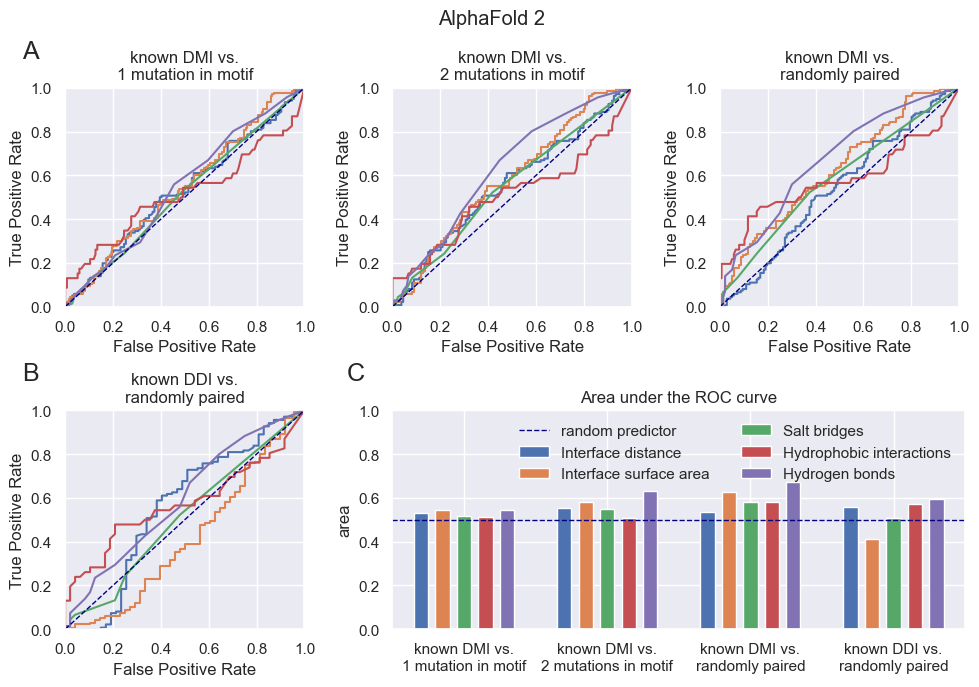

In [ ]:
# New metrics

sns.set_theme()

# fig = plt.figure(figsize=(9,6))
# gs = fig.add_gridspec(2,3)
# ax1 = fig.add_subplot(gs[0, 0])
# ax2 = fig.add_subplot(gs[0, 1])
# ax3 = fig.add_subplot(gs[0, 2])
# ax4 = fig.add_subplot(gs[1, 0])
# ax5 = fig.add_subplot(gs[1, 1:])

fig, axes = plt.subplots(2, 3, figsize=(10,7))

#fig.suptitle("known DMI vs.")    
# axes[0,0].set_title("1 mutation in motif")
# ax2.set_title("2 mutations in motif")
# ax3.set_title("randomly paired DMI")
# ax4.set_title("known DDI vs.\nrandomly paired DDI")
# ax5.set_title("")
axes[0,0].set_title("known DMI vs.\n1 mutation in motif")
axes[0,1].set_title("known DMI vs.\n2 mutations in motif")
axes[0,2].set_title("known DMI vs.\nrandomly paired")
axes[1,0].set_title("known DDI vs.\nrandomly paired")
axes[1,2].set_title("")

# (display name, column name, reverse, highlight)
metric_columns = [#("ranking score", "ranking_score"), 
                  #("model confidence", "model_confidence"),         
                  ("Interface distance", "min_distance", True),
                  ("Interface surface area", "buried_area"),
                  ("Salt bridges", "salt_bridges"),
                  ("Hydrophobic interactions", "hydrophobic_interactions"),
                  ("Hydrogen bonds", "hbonds"),
                  
                ]

metric_columns = [[x[0], x[1] +"_AF2", x[2] if len(x) >= 3 else False, x[3] if len(x) >= 4 else False] for x in metric_columns]

rows_sets = [dataAF[dataAF["num_mutations"] == 1], dataAF[dataAF["num_mutations"] == 2], dataAF[dataAF["benchmark_set"] == "random_DMI"], dataAF[dataAF["benchmark_set"] == "random_DDI"]]
rows_sets = [df[df["model_id"] == "ranked_0"] for df in rows_sets]
rows_trueDMI = dataAF[np.logical_and(dataAF["benchmark_set"] == "known_DMI", dataAF["model_id"] == "ranked_0")]
rows_trueDDI = dataAF[np.logical_and(dataAF["benchmark_set"] == "known_DDI", dataAF["model_id"] == "ranked_0")]

for i, ax, rows_false in zip([0,1,2,3], np.ndarray.flatten(axes)[:4], rows_sets):
    for ii, (metric_label, metric_column, reverse, highlight) in enumerate(metric_columns):
        tr = (rows_trueDDI if ii == 3 else rows_trueDMI)[metric_column].dropna()
        fa = rows_false[metric_column].dropna()
        y_true = [1]*len(tr) + [0]*len(fa)
        y_score = tr.to_list() + fa.to_list()
        if reverse:
            y_score = [-y for y in y_score]
        p = ax.plot(*roc_curve(y_true, y_score)[0:2], label=metric_label)#, alpha=0.2+0.8*highlight)
        c = p[0].get_color()
        roc_score = roc_auc_score(y_true, y_score)
        lbl = None
        if i == 0:
            lbl = metric_label
        axes[1,1].bar([0.7+i+ii*0.15], [roc_score], width=0.1, color=c, label=lbl)

    ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label="random predictor")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')

axes[1,1].set_xticks([1,2,3,4], ["known DMI vs.\n1 mutation in motif", "known DMI vs.\n2 mutations in motif", "known DMI vs.\nrandomly paired", "known DDI vs.\nrandomly paired"])
axes[1,1].set_ylabel("area")
axes[1,1].plot([0.5, 4.5], [0.5, 0.5], color='navy', lw=1, linestyle='--', label="random predictor")
axes[1,1].set_xlim([0.5,4.5])
axes[1,1].set_ylim([0,1])
axes[1,1].set_title("Area under the ROC curve")

fig.suptitle("AlphaFold 2")
fig.tight_layout()

ax11_pos = axes[1,1].get_position()
ax11_pos.x1 += 1/3
axes[1,1].set_position(ax11_pos)

axes[1,1].legend(ncol=2, frameon=False)

axes[1,2].set_visible(False)

#axes[0,2].legend(loc='upper center', bbox_to_anchor=(0.45, -0.4),
#          fancybox=True, shadow=True, ncol=1)

fig.text(0.03,0.91, "A", fontsize=18)
fig.text(0.03,0.45, "B", fontsize=18)
fig.text(0.355,0.45, "C", fontsize=18)

#plt.savefig("./plots/AF2_ROC_curve_new_metrics.png", bbox_inches='tight', dpi=600)
plt.show()


In [ ]:
tr = (rows_trueDDI if ii == 3 else rows_trueDMI)[metric_column].dropna()
fa = rows_false[metric_column].dropna()

### ROC Curves for AF2/AF3